<a href="https://colab.research.google.com/github/Hypatchia/GeomBM-FinancialModeling/blob/main/GeometricBrownianMotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CRISPR Therapeutics AG 
* CRISPR est inscrite à l'ETF ARK GENOMIC REVOLUTION
* CRISPR est dans le domaine de la Biotechnologie .
* CRISPR est basée en Suisse.
* Ils developpent des médicaments basés sur l'edition des gènes pour les maladies graves en modifiant l'ADN Genomique des cellules .
* Stock CRSP est a environs $63.76

#### CRISPR Gene Editing 
* Une technologie recente qui permet de modifier les genes des cellules; elle est dérivée du système immunitaire de bactéries.

#### Potentiel de CRISPR Therapeutics AG 

* Les Gene Editing Stocks on été recommendé par des operateurs de business et de finance ; 

  * Investors.com : "CRISPR stocks will face make-or-break moments in 2022 as Big Pharma joins their quest to cure serious diseases with gene editing technology."

  * Forbes : "[7/1/2021] Gene Editing Stocks Are Worth A Look After Intellia’s Big Breakthrough " (Intellia est fondée par CRISPR).
  * Forbes :" [2022] The long-term outlook for gene editing as a larger theme also appears promising, given the potentially revolutionary drugs under development, that could cure conditions from cancer to rare genetic disorders that currently lack treatments, to more chronic conditions such as diabetes. Considering this, the theme could see upside in the long term and the recent correction could be a buying opportunity."
---

# ARK Genomic Revolution ETF (BATS:ARKG)
 * Un fonds de biotechnologie 
 * Géré  par ARK Investment Management LLC.
 * Son investissement est dans des actions publiques d'entreprises axées sur la croissance à long terme qui font partie de la « révolution génomique », principalement sur le marché américain.
 * Il contient des entreprises les mieux placées dans l avancement des domaines de l'énergie, de l'automatisation, de la fabrication, des matériaux et des transports.

---







# Mouvement Brownien Geometrique 


* Le mouvement Brownien Geometrique est un processus stochastique à temps continu dans lequel le logarithme de la quantité variant de manière aléatoire suit un mouvement brownien ( processus de Wiener ) avec dérivé. Il satisfait une équation différentielle stochastique (SDE): 
$$S_t = S_{t - \Delta t} \cdot \exp \left(\left(r - \frac{\sigma^2}{2} \right)\Delta t + \sigma \sqrt{\Delta t} z \right)$$ 

* Les cours boursiers suivent un mouvement brownien géométrique et donc Le GBM est utilisé en finance pour modéliser les cours des actions dans le modèle Black-Scholes .

# Modele de Black Scholes
* **Option en Finance :**
  *Une option est un contrat conclu entre deux parties qui donne à son détenteur le droit d'acheter ou de vendre un actif sous-jacent à un certain prix pendant une période déterminée.

* Les marchés financiers correspondent assez bien à ce modèle, mais pas exactement bien sûr et, or que le temps n'y est pas continu en realité. Il y a donc un certain écart entre ce modèle et la réalité.


Les conditions du modèle :

* le prix du sous-jacent suit un mouvement brownien géométrique ;
* la volatilité est connue à l'avance et est constante ;
* Il est possible d'acheter et de vendre le sous-jacent à tout moment et sans frais ;
* les ventes à découvert sont autorisées (où on emprunte une certaine quantité du sous-jacent pour la vendre) ;
* Il n'y a pas de dividende ;
* **le taux d'intérêt est connu à l'avance et est constant ;**
* l'exercice de l'option ne peut se faire qu'à la date d'échéance, pas avant (option à exercice européen, dite option européenne).



In [ ]:
# Bibliothèques de bases de python
#Dataframes manipulation
import pandas 
#Vector Operations
import numpy 

import math
# Bibliotheques pour la visualisation 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import plotly.graph_objects as go


#Importation de la classe Autocorrelation function
from statsmodels.tsa.stattools import acf
#Importation de la classe Partial Autocorrelation function
from statsmodels.graphics.tsaplots import plot_acf

#Importation du QQplot 
from statsmodels.graphics.gofplots import qqplot







/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# TP 1 : Estimation des pramatres 




In [ ]:
#Importation des données d'un fichier excel vers un tableau  Dataframe
CRSPR=pandas.read_excel('CRSP.xlsx')
CRSPR.set_index('Date',inplace=True)
CRSPR.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2021-06-07 to 2022-06-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   252 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


In [ ]:
#voir les 10 premieres lignes du CRSPR
CRSPR.head(10)

,Close
Date,
2021-06-07,119.199997
2021-06-08,118.910004
2021-06-09,119.980003
2021-06-10,123.709999
2021-06-11,127.000000
2021-06-14,128.759995
2021-06-15,123.620003
2021-06-16,123.910004
2021-06-17,127.269997


In [ ]:
#toutes les données sont valables " no missing CRSPR "
CRSPR.isnull().values.any()

False

In [ ]:
#Statistiques Descriptive des données
CRSPR.describe()

,Close
count,252.000000
mean,88.799008
std,30.051880
min,43.230000
25%,62.082499
50%,79.910000
75%,119.230001
max,161.889999


In [ ]:
# Graphe des Closing prices pour le CRSP Stock
fig_1 = go.Figure()
fig_1 = px.line(CRSPR, x=CRSPR.index, y='Close',title='CRISPR Therapeutics AG (CRSP) Closing Prices from June 6th 2021 to June 6th 2022')

fig_1.show()

In [ ]:
# Calcul des Rendements et Rendements au carré.
CRSPR['Rendements'] =(numpy.log(CRSPR['Close'].shift()) - numpy.log(CRSPR['Close']))
CRSPR['Rendements_2']=CRSPR['Rendements']**2 

#Elimination de la premiere ligne contenant les valeurs NAN 
CRSPR=CRSPR.dropna()
CRSPR.head(10)

,Close,Rendements,Rendements_2
Date,,,
2021-06-08,118.910004,0.002436,0.000006
2021-06-09,119.980003,-0.008958,0.000080
2021-06-10,123.709999,-0.030615,0.000937
2021-06-11,127.000000,-0.026247,0.000689
2021-06-14,128.759995,-0.013763,0.000189
2021-06-15,123.620003,0.040738,0.001660
2021-06-16,123.910004,-0.002343,0.000005
2021-06-17,127.269997,-0.026755,0.000716
2021-06-18,127.830002,-0.004390,0.000019


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning:

fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.



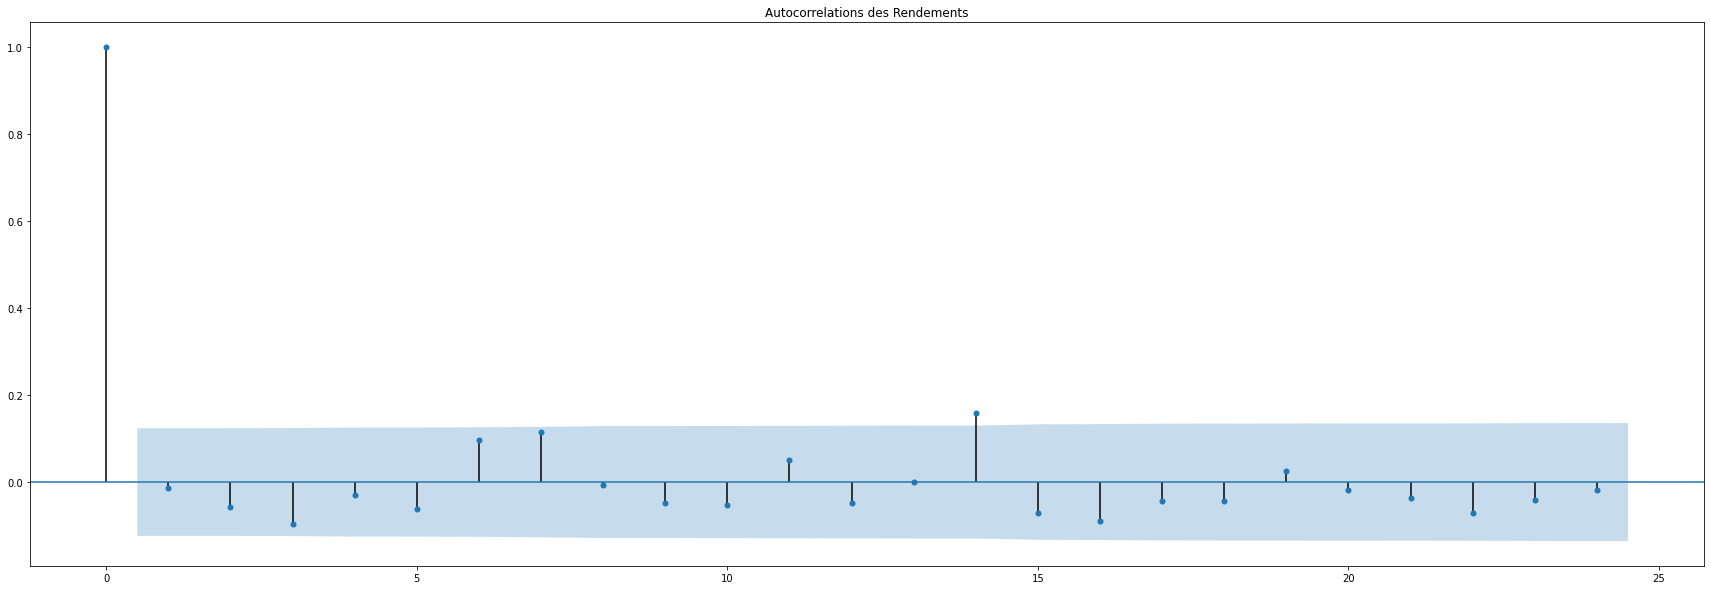

In [ ]:
# ACF des rendements
fig_2, ax_1 = plt.subplots(nrows=1, ncols=1,figsize=(30, 10))
autocorr_rendementsn= acf(CRSPR['Rendements']) 
plot_acf(CRSPR['Rendements'], ax=ax_1,title='Autocorrelations des Rendements'); 


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning:

fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.



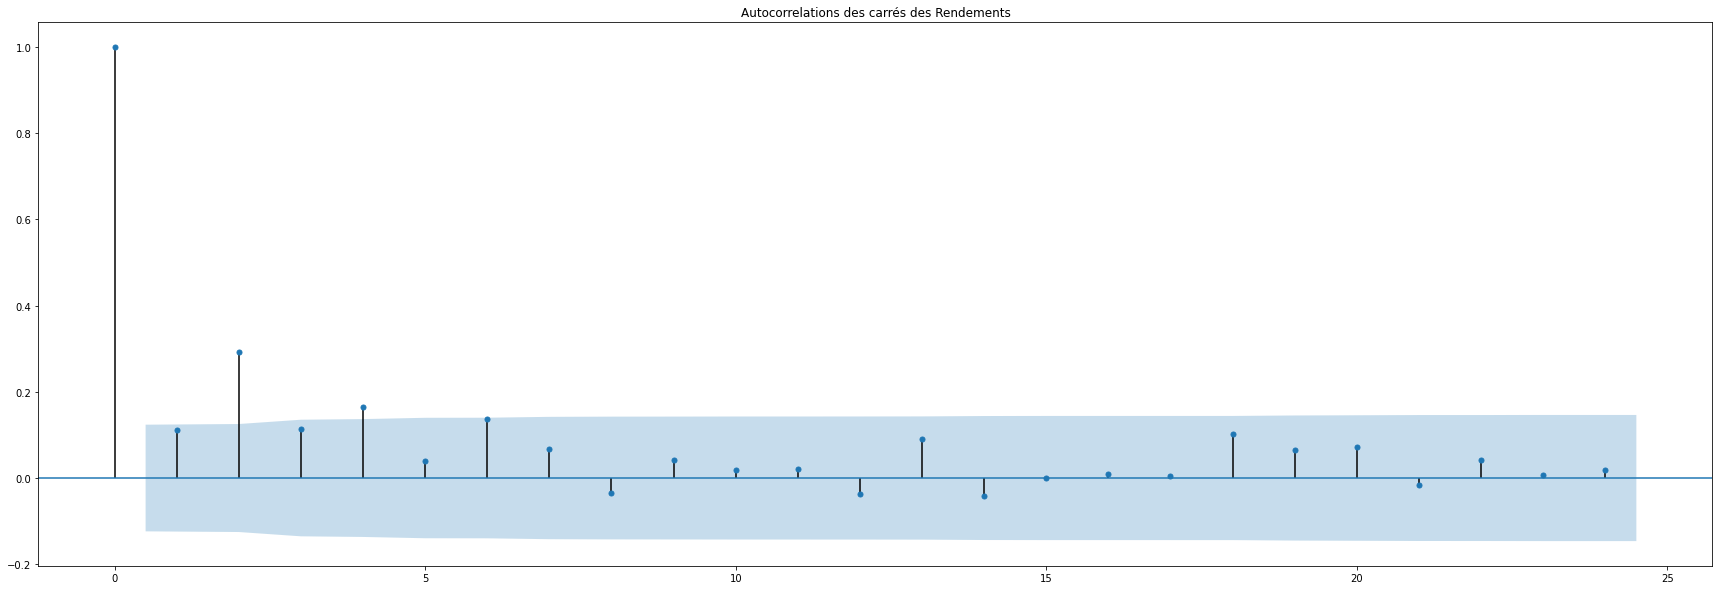

In [ ]:
#ACF des carrés des rendements
fig_3 ,ax_2 = plt.subplots(nrows=1, ncols=1,figsize=(30, 10))
autocorr_rendements_2= acf(CRSPR['Rendements_2'])
plot_acf(CRSPR['Rendements_2'], ax=ax_2,title='Autocorrelations des carrés des Rendements'); 

In [ ]:
# Test des Autocorrelations :
from statsmodels.stats.diagnostic import acorr_ljungbox

# Rendements
lb_test_rendements=acorr_ljungbox(CRSPR['Rendements'])
print('P-values are for return test: ',lb_test_rendements[1],'\n')

#Rendements au carré

lb_test_rendements_2=acorr_ljungbox(CRSPR['Rendements_2'])
print('P-values for return squared test are: ',lb_test_rendements_2[1])

P-values are for return test:  [0.8298883  0.6383997  0.3452924  0.469939   0.46997974 0.32191323
 0.16538613 0.23496595 0.27212331 0.29964402 0.33023198 0.36502295
 0.44353596 0.13957562 0.13390778 0.10743085 0.12590115 0.14594648
 0.17878811 0.21890191 0.25077161 0.23797375 0.26355347 0.30886382
 0.27941275 0.3018682  0.32232413 0.33635232 0.32757912 0.36923659
 0.39000308 0.21953652 0.23654093 0.27105537 0.04374321 0.04467467
 0.05572266 0.06162978 0.04358443 0.04840276] 

P-values for return squared test are:  [7.42119787e-02 4.04155932e-06 3.30848654e-06 4.31419288e-07
 1.15797462e-06 3.80635469e-07 6.35387193e-07 1.43138596e-06
 2.88368260e-06 6.38169883e-06 1.32275106e-05 2.37252922e-05
 2.00884516e-05 3.28515757e-05 6.20287609e-05 1.12352826e-04
 1.97732989e-04 1.30785162e-04 1.49791526e-04 1.58777120e-04
 2.58460454e-04 3.61987988e-04 5.74616774e-04 8.69519416e-04
 1.25599796e-03 1.86848250e-03 2.70436633e-03 3.35606976e-03
 4.68558829e-03 6.44747275e-03 7.30603139e-03 7.00029

In [ ]:
#Test normality rendements
#On veut tester la normality des rendements
#Plotting Histograms

fig_3 = px.histogram(CRSPR, x="Rendements", nbins=20)
fig_3.show()

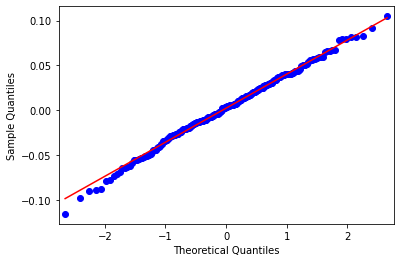

In [ ]:
#Test Normalité : QQ Plot
qqplot(CRSPR['Rendements'], line='s')
plt.show()

### Analyse des Autocorrélations :


* On remarque que les autocorrelation sont presque nulles donc les rendements rj sont des  iid

* les rendements au carrés sont aussi non corrélés 
* les rendements suivent une loi normale d'aprés l'histogramme et le QQ plot
* ce qui correspond aux propriétes theoriques des rendements qui suivent une loi normale de parametres mu et sigma



In [ ]:
#Parameter Etimation :  pour les rendements


h=1
R_mean=numpy.mean(CRSPR['Rendements'])*252
print('R_mean:',R_mean)
R_variance=numpy.var(CRSPR['Rendements'])*252
print('R_variance:',R_variance)
R_std=numpy.sqrt(R_variance)
print('R_std: ',R_std)

#Parameter Etimation :  pour la trajectoire  S
drift = (R_mean/h) +R_variance/2*h
print('drift:',drift)
volatility=R_std/math.sqrt(h)
print('volatility',volatility)

R_mean: 0.621108499499259
R_variance: 0.36287666903094257
R_std:  0.6023924543276937
drift: 0.8025468340147303
volatility 0.6023924543276937


# TP2 : Simulation 

In [ ]:
# Set values 
#valeur S0
init_value=100

#le temps : une année
T=1
#le pas du temps
dt=T/250
#nbr de trajectoires a simuler 
nt=100

#L'echelle de chaque trajectoire est 250valeurs
k=250
def  simulation_gbm(drift, volatility , initial_value, n, time_difference):
  #simuler N variables aleatoires suivant la loi normal (0,1) 
  # on utilise la fonction predéfinie standard_normal 
  # Standardization : Données centrées reduites
  N = numpy.random.standard_normal((k+1,n))
  N -= N.mean()
  N /= N.std()

  S=numpy.zeros((k+1,n))
  S[0]=initial_value
  for i in range(1,k+1):
    S[i] = S[i-1] * numpy.exp((drift - volatility ** 2 / 2) * time_difference + volatility * math.sqrt(time_difference) * N[i])
  return S

In [ ]:
#Simulation et Trace de graphe :
simulated_paths=simulation_gbm(drift,volatility,init_value,nt,dt)
figure= px.line(simulated_paths,title='Simulated paths of n gbms')

figure.show()

/usr/local/lib/python3.7/dist-packages/plotly/express/_core.py:1222: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



In [ ]:
simulated_paths_df=pandas.DataFrame(simulated_paths)
simulated_paths_df.tail()

#Les valeurs reelles sont en noir
columns_list= simulated_paths_df.columns

figure_x= px.line(simulated_paths_df,x=simulated_paths_df.index, y=columns_list,title='Simulated paths of n gbms vs Real values of CRSPR Stock')

figure_x.add_trace(go.Scatter(x=simulated_paths_df.index, y=CRSPR['Close'],
                         mode = 'lines',
                         line_color = 'black', name='CRSPR Stock Value'))


figure_x.show()

/usr/local/lib/python3.7/dist-packages/plotly/express/_core.py:1222: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



In [ ]:
# Prevision future
#Stock price simulation model using Log Volatility Equation
path=pandas.DataFrame(simulation_gbm(drift,volatility,init_value,1,dt),columns=['Simulated Closing Prices'])
path.index=CRSPR.index
path['past']=path['Simulated Closing Prices'].shift(-1)
path['Forecasted']=path['past']+numpy.exp((drift-((1/2)*(volatility**2))+volatility))
path=path.dropna()

In [ ]:
#Datafrme contenat les valeurs simulées et leurs forecasts pour un pas de 1
path

,Simulated Closing Prices,past,Forecasted
Date,,,
2021-06-08,100.000000,102.082066,105.481133
2021-06-09,102.082066,98.183633,101.582700
2021-06-10,98.183633,95.492818,98.891884
2021-06-11,95.492818,93.634316,97.033382
2021-06-14,93.634316,91.124649,94.523716
...,...,...,...
2022-05-26,168.868876,176.056053,179.455120
2022-05-27,176.056053,176.918158,180.317225
2022-05-31,176.918158,177.504759,180.903826


### Pour mesurer l accuracy de prevision j'ai utlisé le MAPE 

In [ ]:
#Mesure de l Erreur de prevision
MAPE=sum((abs(path['Simulated Closing Prices']-path['Forecasted']))/path['Simulated Closing Prices'])/len(path)

MAPE

0.04309500080516339

# MAPE= 3% donc <10  : => High Accuracy du forecast.

# TP 3 : Simulation ETF ARK 



In [ ]:
#Une fonction qui prend une column (1 company) et estime les parametres des stock prices
def  ParameterEstimation(Series):
    Rendements =(numpy.log(Series.shift()) - numpy.log(Series)).dropna()
    Rendements_2=Rendements**2
    R_mean=numpy.mean(Rendements)*252
    R_variance=numpy.var(Rendements)*252
    R_std=numpy.sqrt(R_variance)
    #Parameter Estimation :
    lag=1
    drift = (R_mean/lag) +R_variance/(2*lag)
    volatility=R_std/math.sqrt(lag)
    return drift, volatility

In [ ]:

shares=[6129323, 4482760,4017296,1952910,8326070,4419905,375399,1252984, 3484720,2409799]

In [ ]:
ARKGenomicStocks=pandas.DataFrame(pandas.read_excel('ARKStocks.xlsx'))
ARKGenomicStocks.isnull().any()

Date                          False
IONIS PHARMACEUTICALS INC     False
TELADOC HEALTH INC            False
CRISPR THERAPEUTICS AG        False
EXACT SCIENCES CORP           False
SIGNIFY HEALTH INC            False
FATE THERAPEUTICS INC         False
VERTEX PHARMACEUTICALS INC    False
 INCYTE CORP INCY             False
 CAREDX INC                   False
TWIST BIOSCIENCE CORP         False
dtype: bool

In [ ]:
ARKGenomicStocks.set_index('Date',inplace=True)

In [ ]:
ARKGenomicStocks.describe()

,IONIS PHARMACEUTICALS INC,TELADOC HEALTH INC,CRISPR THERAPEUTICS AG,EXACT SCIENCES CORP,SIGNIFY HEALTH INC,FATE THERAPEUTICS INC,VERTEX PHARMACEUTICALS INC,INCYTE CORP INCY,CAREDX INC,TWIST BIOSCIENCE CORP
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,35.019206,104.441706,88.799008,86.288016,18.625794,55.051190,218.064961,73.835079,53.913413,83.470833
std,3.562140,41.815696,30.051880,20.897691,6.023597,20.714383,30.848043,5.742115,21.034032,33.439594
min,25.610001,28.680000,43.230000,47.549999,11.230000,21.139999,177.009995,63.340000,21.700001,26.620001
25%,32.209999,69.760000,62.082499,71.307499,13.717500,37.740000,191.299995,68.649998,37.945001,51.320000
50%,35.409999,98.090001,79.910000,82.950001,16.560001,55.004999,207.335000,74.280002,44.755001,89.770001
75%,37.862500,144.330002,119.230001,100.752500,24.435000,71.547499,241.125000,77.242502,71.417500,114.275000
max,43.000000,171.360001,161.889999,131.009995,30.809999,95.730003,290.929993,87.529999,95.110001,135.880005


In [ ]:
means=[]
vars=[]
for column in ARKGenomicStocks:
  mu,sigma=ParameterEstimation(ARKGenomicStocks[column])
  means.append(mu)
  vars.append(sigma)

print(means)
print(vars)

[0.10361964695299933, 1.8153573422612022, 0.8025468340147303, 1.0147934630765558, 0.9569916463923618, 1.4803819167775556, -0.21270687185092826, 0.18241409749824272, 1.5181217951655288, 1.5180639618060139]
[0.4720728042621015, 0.8096061340311262, 0.6023924543276937, 0.5552034897575887, 0.6396590061127407, 0.7684226082875786, 0.2882647644987013, 0.28786975667626963, 0.7729012122833469, 0.7835265924699489]


In [ ]:
mean_ETF=numpy.sum(numpy.array(means)*numpy.array(shares))


variance_ETF=numpy.sum((numpy.array(vars)*numpy.array(shares)))

Initial_value_ETF= numpy.mean(ARKGenomicStocks.iloc[0])

In [ ]:
Initial_value_ETF

100.61899919999999

In [ ]:
print(mean_ETF)
variance_ETF


37587095.323844515


23799604.939122133

In [ ]:
taken_mean_etf = mean_ETF/10000000
print(taken_mean_etf)
taken_variance_etf=variance_ETF/10000000

3.7587095323844513


In [ ]:
simulated_ETF_ARK=simulation_gbm(taken_mean_etf ,taken_variance_etf,Initial_value_ETF,10,dt)

In [ ]:
ETFARK_Stock=pandas.DataFrame(pandas.read_excel('ARKG.xlsx'))
ETFARK_Stock.set_index('Date',inplace=True)

In [ ]:
ETFARK_Stock

,Close
Date,
2021-06-07,83.150002
2021-06-08,83.970001
2021-06-09,85.010002
2021-06-10,87.309998
2021-06-11,86.930000
...,...
2022-05-27,33.639999
2022-05-31,32.259998
2022-06-01,31.160000


In [ ]:
simulated_ETF_ARK=simulation_gbm(taken_mean_etf ,taken_variance_etf,Initial_value_ETF,1,dt)
simulated_paths_df_s=pandas.DataFrame(simulated_ETF_ARK)

simulated_paths_df_s
figure_y = px.line(simulated_paths_df_s, title='Simulated ETF ARK Genomic')



figure_y.show()






In [ ]:
simulated_paths_df_s.tail()

,0
246,214.966466
247,194.098574
248,204.877727
249,223.670624
250,252.836440


In [ ]:
figure_y.add_trace(go.Scatter(x=simulated_paths_df_s.index, y=ETFARK_Stock['Close'],
                         mode = 'lines',
                         line_color = 'black',
                         name='ETF ARK Stock Values'))
figure_y.show()